[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/solomontessema/Data-Analysis-of-Income-Poverty-and-Family-Composition/blob/main/An%20Analysis%20of%20Income%2C%20Poverty%2C%20and%20Family%20Composition.ipynb)

Exploring the Economic Dynamics of American Families: An Analysis of Income, Poverty, and Family    Composition

## Solomon T Tessema

February 20, 2024

National University

TIM-8501 v4: Exploratory Data Analysis

Dr. Lawrence Fulton

February 20, 2024

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

# Load the dataset
file_path = 'ffpub20.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset for a preliminary overview
df_info = df.info()

# Display descriptive statistics for key columns identified for analysis
descriptive_stats = df[['FPERSONS', 'FANNVAL', 'POVLL', 'FEDVAL', 'FINC_ANN', 'FOWNU18']].describe()

df_info, descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69959 entries, 0 to 69958
Data columns (total 85 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   FPOVCUT     69959 non-null  int64
 1   FPERSONS    69959 non-null  int64
 2   FHEADIDX    69959 non-null  int64
 3   FSPOUIDX    69959 non-null  int64
 4   FOWNU6      69959 non-null  int64
 5   FRELU6      69959 non-null  int64
 6   FKIND       69959 non-null  int64
 7   FKINDEX     69959 non-null  int64
 8   FTYPE       69959 non-null  int64
 9   FRELU18     69959 non-null  int64
 10  FOWNU18     69959 non-null  int64
 11  FLASTIDX    69959 non-null  int64
 12  FMLASIDX    69959 non-null  int64
 13  FH_SEQ      69959 non-null  int64
 14  FAMLIS      69959 non-null  int64
 15  FANNVAL     69959 non-null  int64
 16  FCSPVAL     69959 non-null  int64
 17  FDISVAL     69959 non-null  int64
 18  FDIVVAL     69959 non-null  int64
 19  FDSTVAL     69959 non-null  int64
 20  FEARNVAL    69959 non-null  

(None,
            FPERSONS        FANNVAL         POVLL         FEDVAL      FINC_ANN  \
 count  69959.000000   69959.000000  69959.000000   69959.000000  69959.000000   
 mean       2.340771     365.381838      9.518289     409.331123      1.975829   
 std        1.460213    4989.603246      4.286434    3081.680122      0.153582   
 min        1.000000       0.000000     -1.000000       0.000000      1.000000   
 25%        1.000000       0.000000      6.000000       0.000000      2.000000   
 50%        2.000000       0.000000     10.000000       0.000000      2.000000   
 75%        3.000000       0.000000     14.000000       0.000000      2.000000   
 max       13.000000  396000.000000     14.000000  100000.000000      2.000000   
 
             FOWNU18  
 count  69959.000000  
 mean       0.548135  
 std        0.996159  
 min        0.000000  
 25%        0.000000  
 50%        0.000000  
 75%        1.000000  
 max        9.000000  )

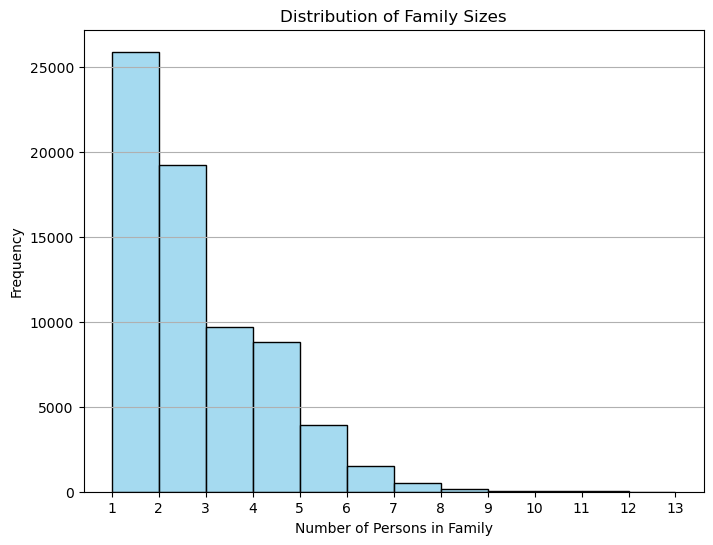

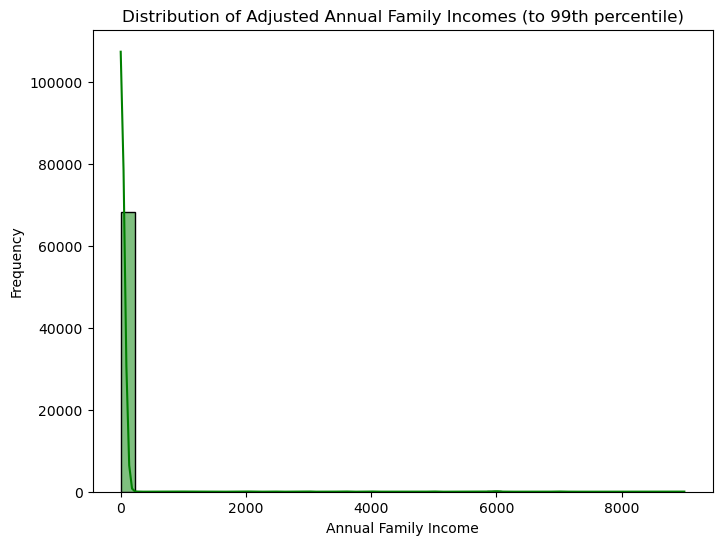

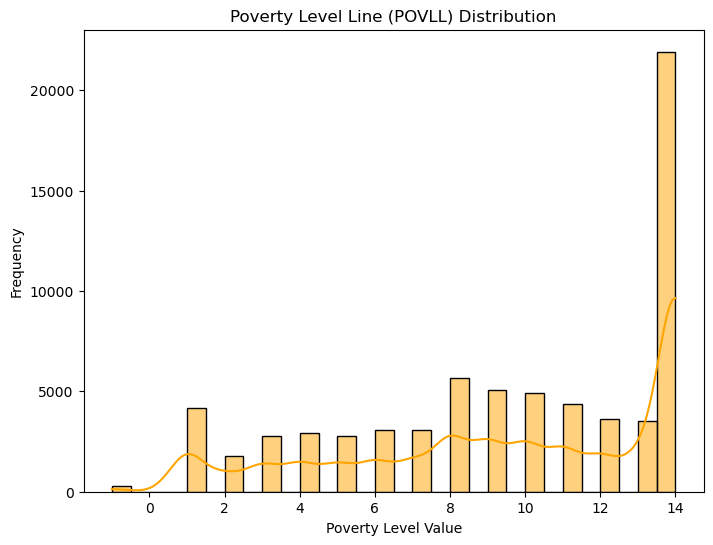

In [24]:

# 1. Distribution of Family Sizes
plt.figure(figsize=(8, 6))
sns.histplot(df['FPERSONS'], bins=range(1, df['FPERSONS'].max() + 1), kde=False, color='skyblue')
plt.title('Distribution of Family Sizes')
plt.xlabel('Number of Persons in Family')
plt.ylabel('Frequency')
plt.xticks(range(1, df['FPERSONS'].max() + 1))
plt.grid(axis='y')
plt.show()

# 2. Distribution of Adjusted Annual Family Incomes
plt.figure(figsize=(8, 6))
sns.histplot(df[df['FANNVAL'] <= df['FANNVAL'].quantile(0.99)]['FANNVAL'], bins=40, color='green', kde=True)
plt.title('Distribution of Adjusted Annual Family Incomes (to 99th percentile)')
plt.xlabel('Annual Family Income')
plt.ylabel('Frequency')
plt.show()

# 3. Distribution of Poverty Level Line (POVLL)
plt.figure(figsize=(8, 6))
sns.histplot(df['POVLL'], bins=30, color='orange', kde=True)
plt.title('Poverty Level Line (POVLL) Distribution')
plt.xlabel('Poverty Level Value')
plt.ylabel('Frequency')
plt.show()


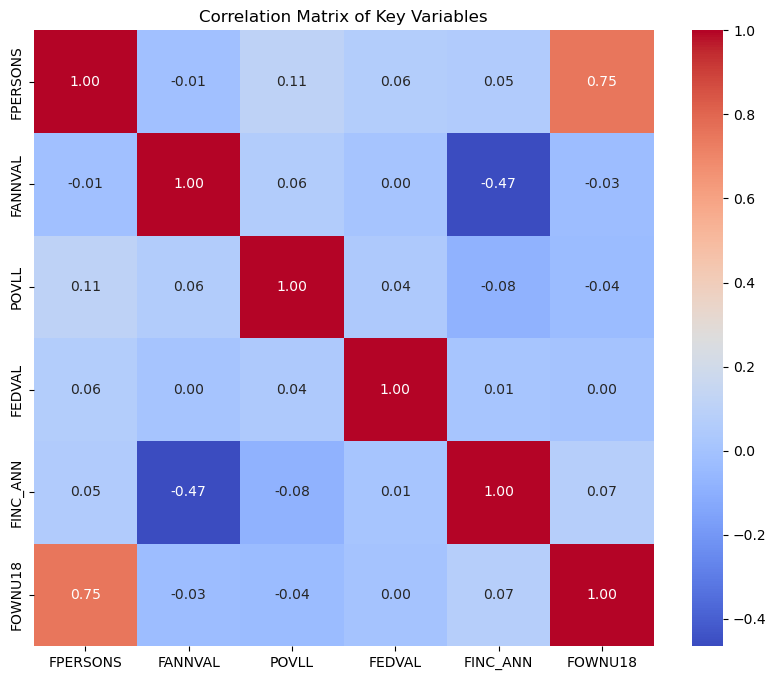

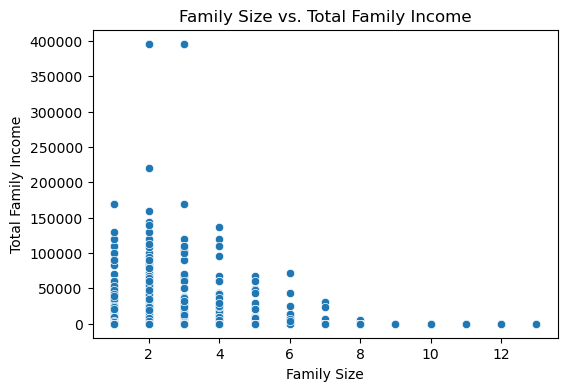

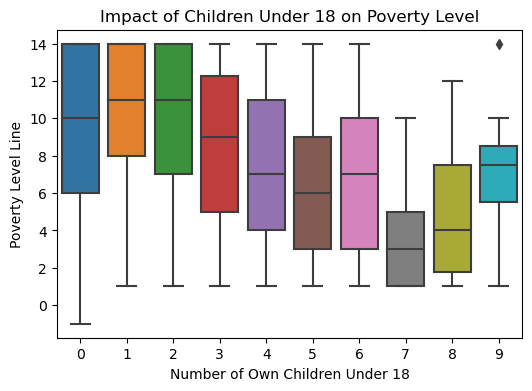

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation analysis for selected variables
correlation_matrix = df[['FPERSONS', 'FANNVAL', 'POVLL', 'FEDVAL', 'FINC_ANN', 'FOWNU18']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Key Variables')
plt.show()

# Further analysis on specific hypotheses
# Hypothesis 1: Relationship between family size (FPERSONS) and total family income (FANNVAL)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='FPERSONS', y='FANNVAL', data=df)
plt.title('Family Size vs. Total Family Income')
plt.xlabel('Family Size')
plt.ylabel('Total Family Income')
plt.show()

# Hypothesis 2: Impact of children under 18 (FOWNU18) on poverty level (POVLL)
plt.figure(figsize=(6, 4))
sns.boxplot(x='FOWNU18', y='POVLL', data=df)
plt.title('Impact of Children Under 18 on Poverty Level')
plt.xlabel('Number of Own Children Under 18')
plt.ylabel('Poverty Level Line')
plt.show()


In [26]:
# To further analyze the dataset according to the EDA plan, we'll investigate the relationships and test the hypotheses mentioned earlier.
# This involves more detailed analysis such as regression analysis for hypothesis testing.

# For simplicity and demonstration, we'll perform a linear regression analysis to test the relationship between family size (FPERSONS) and total family income (FANNVAL).
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Preparing data for regression analysis
X = df[['FPERSONS']]  # Independent variable: family size
y = df['FANNVAL']  # Dependent variable: total family income

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating the coefficient of determination (R^2)
r2_score_value = r2_score(y_test, y_pred)

# Display the R^2 score to assess the model's performance
r2_score_value


-0.00022652786639776323

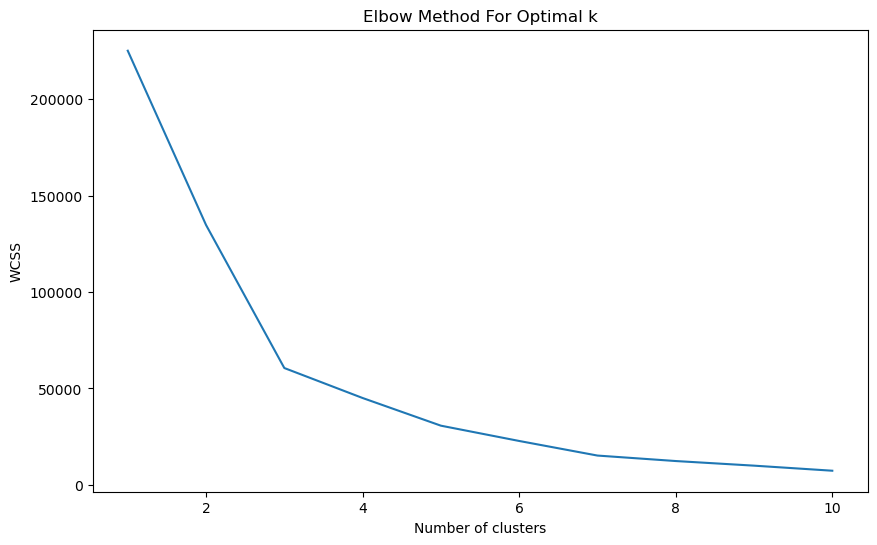

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting a subset of the dataset for clustering analysis
cluster_data = df[['FPERSONS', 'FANNVAL', 'FEDVAL', 'FINC_ANN', 'FOWNU18']]

# Standardizing the data
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(cluster_scaled)

# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(cluster_pca)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

C:\Users\stessema\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


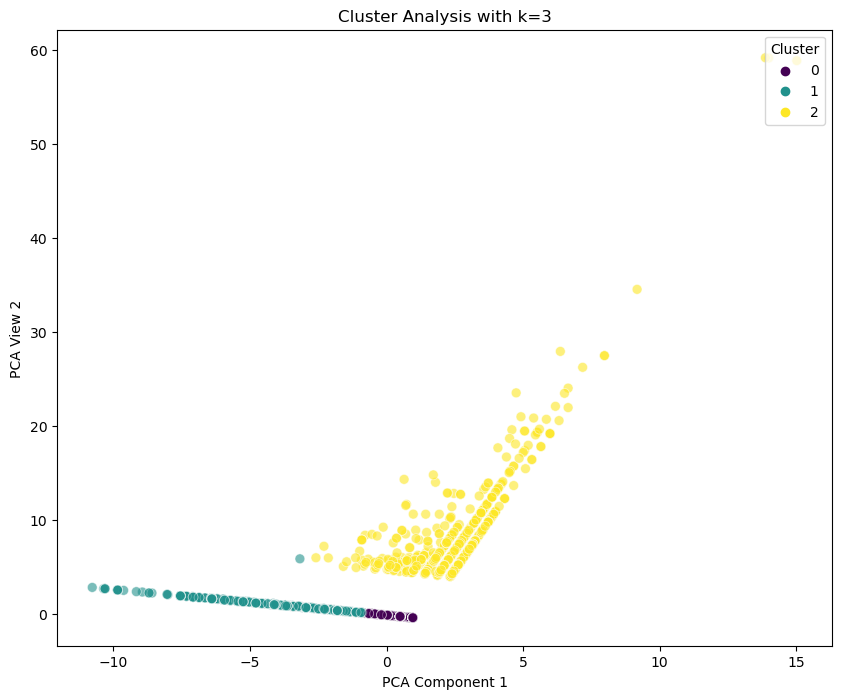

In [28]:
#importing necessary libraries for plotting due to execution state reset
import matplotlib.pyplot as plt
import seaborn as sns

#n_cluseter = 3 based on the elbow method.

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_pca)
cluster_labels = kmeans.predict(cluster_pca)

# plotting the clusters with k=3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cluster_pca[:, 0], y=cluster_pca[:, 1], hue=cluster_labels, palette="viridis", s=50, alpha=0.6)
 
plt.title('Cluster Analysis with k=3')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA View 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()
